# 선형 회귀 모델을 이용한 자동차 연비(MPG) 예측

## 기본 라이브러리 임포트

In [2]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 준비하기

In [4]:
df =pd.read_csv('/content/auto-mpg.csv', header=None)
df.columns = df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## 데이터 전처리

In [6]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [7]:
# horsepower 컬럼의 ? 값 제거
# ? -> NaN -> dropna() -> horsepower 컬럼 dtype를 float 변환

df['horsepower'].replace("?", np.nan, inplace = True)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [8]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [9]:
df.dropna(subset = ['horsepower'], axis = 0, inplace = True) # row을 지우기 때문에 axis = 0
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [10]:
# 데이터타입 변경
df['horsepower'] = df['horsepower'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## 예측 모델 성능 평가

*   feature 선택 3개 이상
*   y(target) -> mpg
*   훈련셋(70%), 테스트셋(30%), random_state=7 고정
*   모델 (LinearRegression, Ridge, Lasso) 사용
*   모델의 정확도가 가장 높은 모델 선택 (alpha 조정 가능)
*   훈련셋과 테스트셋 결과 출력(차트도 가능)



### 라이브러리 불러오기

In [11]:
!pip install koreanize-matplotlib
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 2.0 MB/s eta 0:00:00


In [12]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

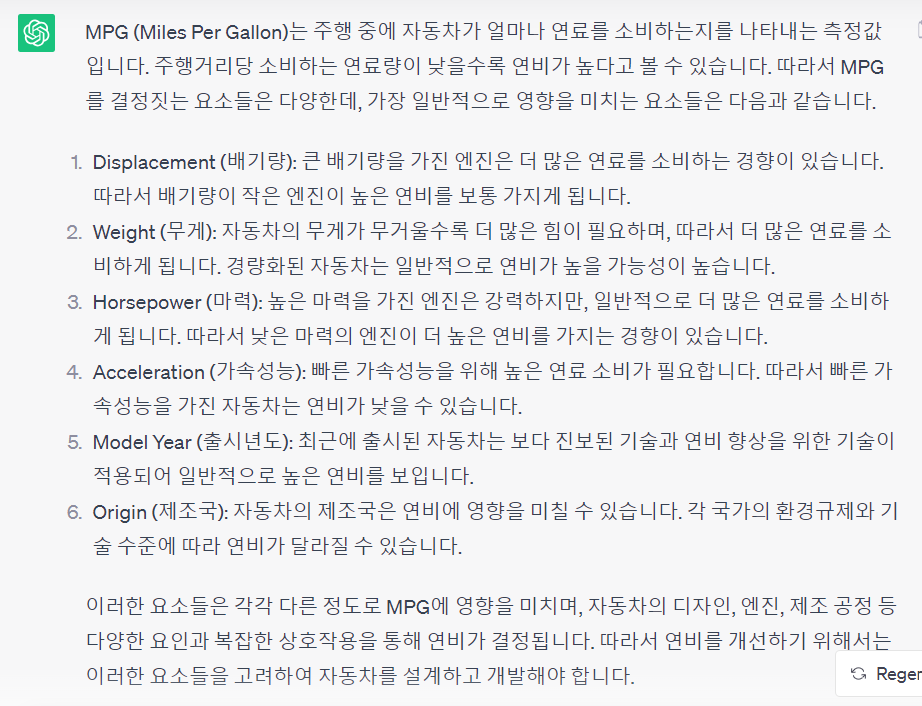

### 성능평가를 위한 데이터 분리하기(train/test)

In [13]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']] # 문자열은 머신러닝 학습이 안되기 때문에 name 제외
y = df['mpg']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [15]:
X_test.shape # 392행의 30% -> 약 118개의 데이터, 8개의 feature

(118, 7)

### LinearRegression 모델

#### LinearRegression 모델 설정하기

In [16]:
lr = LinearRegression()

#### LinearRegression 모델 학습하기

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

#### lr 모델 객체 확인하기

In [18]:
print('lr.coef_ :', lr.coef_) # 가중치 (w)
print('lr.intercept_ :', lr.intercept_) # 절편 (b)

# 가중치가 모두 0에 근접, origin이 가중치 절대값이 가장 높음

lr.coef_ : [-0.69331972  0.01739275 -0.01411888 -0.00605481 -0.04467033  0.76933023
  1.57749904]
lr.intercept_ : -16.967851121893116


#### 성능 평가

In [19]:
print('훈련 데이터셋의 R2: ', lr.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lr.score(X_test, y_test))

훈련 데이터셋의 R2:  0.8222086244764623
테스트 데이터셋의 R2:  0.8119653015163926


### Ridge 회귀 모델

In [72]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(X_train, y_train)

#### 릿지회귀 성능 평가

In [21]:
# alpha = 1일 때

print('훈련 데이터셋의 R2: ', ridge.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', ridge.score(X_test, y_test))

# 선형 회귀와 거의 동일

훈련 데이터셋의 R2:  0.822206518247484
테스트 데이터셋의 R2:  0.8121554347378483


In [36]:
# alpha = 0.01
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)

print('훈련 데이터셋의 R2: ', ridge001.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', ridge001.score(X_test, y_test))

# 규제를 약화한 경우에도 성능이 비슷한 것을 확인할 수 있음

훈련 데이터셋의 R2:  0.8222086242605718
테스트 데이터셋의 R2:  0.8119672547938834


In [23]:
# alpha = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('훈련 데이터셋의 R2: ', ridge10.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', ridge10.score(X_test, y_test))

# 규제를 강화한 경우도 마찬가지인 것을 확인

훈련 데이터셋의 R2:  0.822037894324191
테스트 데이터셋의 R2:  0.8134746200261043


#### for문을 이용한 규제에 따른 ridge 회귀 모델 성능평가

62
0.8153487668287418


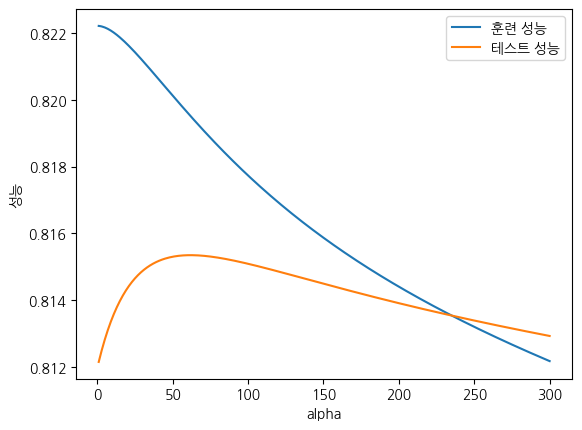

In [27]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 301):
  ridge_ = Ridge(alpha = i).fit(X_train, y_train)

  train_list.append(ridge_.score(X_train, y_train))
  test_list.append(ridge_.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,301), train_list, label = '훈련 성능')
plt.plot(range(1,301), test_list, label = '테스트 성능')
plt.xlabel('alpha')
plt.ylabel('성능')
plt.legend()
plt.show()


### lasso 회귀 모델

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

#### lasso 회귀 모델 성능평가

In [29]:
import numpy as np

In [30]:
# alpha = 1일 경우

print('훈련 데이터셋의 R2: ', lasso.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lasso.score(X_test, y_test))
print('학습에 사용한 특성 개수: ', np.sum(lasso.coef_ != 0))
print(lasso.coef_)

# 훈련 데이터셋 성능이 간소한 차이로 하락
# 학습에 사용한 특성 개수는 4개 -> 배기량, 마력, 무게, 출시년도 (실린더, 가속, 제조국은 0)

훈련 데이터셋의 R2:  0.8050949247321858
테스트 데이터셋의 R2:  0.8105884755066382
학습에 사용한 특성 개수:  4
[-0.         -0.00154821  0.00152036 -0.00671533 -0.          0.68214202
  0.        ]


In [31]:
# alpha = 0.01일 경우
lasso01 = Lasso(alpha = 0.01).fit(X_train, y_train)

print('훈련 데이터셋의 R2: ', lasso01.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lasso01.score(X_test, y_test))
print('학습에 사용한 특성 개수: ', np.sum(lasso01.coef_ != 0))
print(lasso01.coef_)

# 학습에 사용한 특성 개수 7개 (모두 사용)

훈련 데이터셋의 R2:  0.8221938824821197
테스트 데이터셋의 R2:  0.812631393142329
학습에 사용한 특성 개수:  7
[-0.64639669  0.01652508 -0.01301468 -0.00609351 -0.03793016  0.76854409
  1.54433989]


In [32]:
# alpha = 10일 경우
lasso10 = Lasso(alpha = 10).fit(X_train, y_train)

print('훈련 데이터셋의 R2: ', lasso10.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lasso10.score(X_test, y_test))
print('학습에 사용한 특성 개수: ', np.sum(lasso10.coef_ != 0))
print(lasso10.coef_)

# 규제를 강화한 결과, 훈련 데이터셋 성능 저하 and 데스트 데이터셋 성능 저하
# 학습에 사용한 특성 개수 2개 -> 배기량, 무게 (실린더, 마력, 가속, 출시년도, 제조국은 0)

훈련 데이터셋의 R2:  0.6946306270417568
테스트 데이터셋의 R2:  0.705922246391786
학습에 사용한 특성 개수:  2
[-0.         -0.0119071  -0.         -0.00646422  0.          0.
  0.        ]


#### for문을 이용한 규제에 따른 lasso 회귀 모델 성능평가

0.12335000000000002
0.8160345943109207


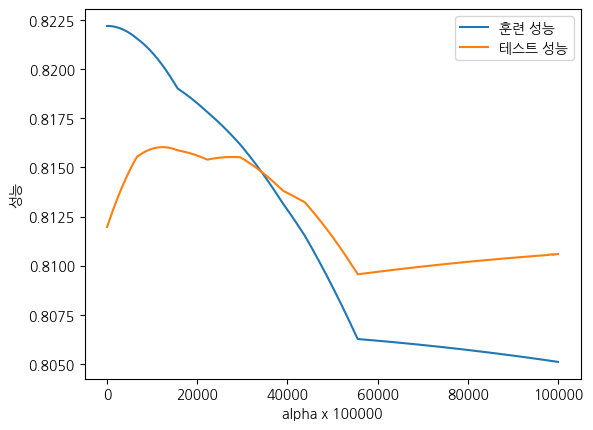

In [29]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 100001):
  lasso_ = Lasso(alpha = 0.00001*i).fit(X_train, y_train)

  train_list.append(lasso_.score(X_train, y_train))
  test_list.append(lasso_.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = 0.00001*i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,100001), train_list, label = '훈련 성능')
plt.plot(range(1,100001), test_list, label = '테스트 성능')
plt.xlabel('alpha x 100000')
plt.ylabel('성능')
plt.legend()
plt.show()

0.123
0.8160345757824176


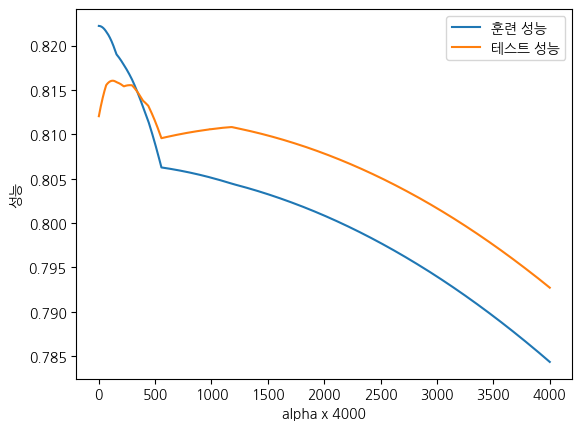

In [35]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 4001):
  lasso_ = Lasso(alpha = 0.001*i).fit(X_train, y_train)

  train_list.append(lasso_.score(X_train, y_train))
  test_list.append(lasso_.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = 0.001*i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,4001), train_list, label = '훈련 성능')
plt.plot(range(1,4001), test_list, label = '테스트 성능')
plt.xlabel('alpha x 4000')
plt.ylabel('성능')
plt.legend()
plt.show()

In [ ]:
#  라쏘 회귀
from sklearn.linear_model import Lasso


lst = []
train_scores = []
test_scores = []
alpha = []
for i in range(1,100000+1):
    i *= 0.00001
    alpha.append(i)
    # 모델 생성 및 학습
    lasso = Lasso(alpha=i).fit(X_train, y_train)

    # 훈련 데이터셋 R2 저장
    train_scores.append(lasso.score(X_train, y_train))

    # 테스트 데이터셋 R2 저장
    test_scores.append(lasso.score(X_test, y_test))

    lst.append({ 'alpha':i,
                '훈련 데이터셋 R2':lasso.score(X_train, y_train),
                '테스트 데이터셋 R2': lasso.score(X_test, y_test) })

max_r2 = lst[0]
for dic in lst[1:]:
    if dic['테스트 데이터셋 R2'] > max_r2['테스트 데이터셋 R2']:
        max_r2 = dic

for key in max_r2:
    print("%s : %s" %(key, max_r2[key]))

#비교 그래프 그리기
plt.figure(dpi=100)

plt.plot(alpha, train_scores, label='훈련 데이터셋 R2')
plt.plot(alpha, test_scores, label='테스트 데이터셋 R2')
plt.xlabel('alpha')
plt.ylabel('정확도')
plt.legend()
plt.show()

In [30]:
lasso123 = Lasso(alpha = 0.12335).fit(X_train, y_train)

print('훈련 데이터셋의 R2: ', lasso123.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lasso123.score(X_test, y_test))
print('학습에 사용한 특성 개수: ', np.sum(lasso123.coef_ != 0))
print(lasso123.coef_)


# feature : 가속을 제외한 나머지 6개 feature를 사용

훈련 데이터셋의 R2:  0.8201871356847772
테스트 데이터셋의 R2:  0.8160345943109208
학습에 사용한 특성 개수:  6
[-0.13951554  0.00674526 -0.00391623 -0.00640886 -0.          0.75954196
  1.17214469]


### 배기량, 마력, 무게, 출시년도 (제외 : 실린더, 가속, 제조국) - good

In [81]:
X = df[['displacement', 'horsepower', 'weight', 'model year']] # 문자열은 머신러닝 학습이 안되기 때문에 name 제외
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

X_test.shape

(118, 4)

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('lr.coef_ :', lr.coef_) # 가중치 (w)
print('lr.intercept_ :', lr.intercept_) # 절편 (b)
print('훈련 데이터셋의 R2: ', lr.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lr.score(X_test, y_test))


lr.coef_ : [-0.00236924  0.01011672 -0.0068196   0.77517253]
lr.intercept_ : -15.793056030655219
훈련 데이터셋의 R2:  0.8067813869254054
테스트 데이터셋의 R2:  0.8074102399761782


319
0.8083779606305476


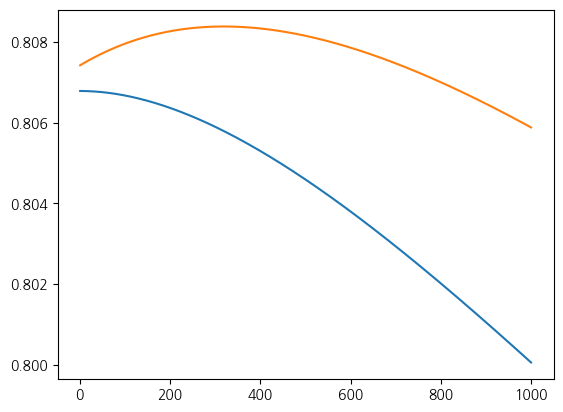

In [82]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 1001):
  ridge = Ridge(alpha = i).fit(X_train, y_train)

  train_list.append(ridge.score(X_train, y_train))
  test_list.append(ridge.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,1001), train_list, label = '훈련 성능')
plt.plot(range(1,1001), test_list, label = '테스트 성능')
plt.show()

### 실린더, 마력, 가속, 출시년도, 제조국 (제외 : 배기량, 무게) - bad

In [35]:
X = df[['cylinders', 'horsepower', 'acceleration', 'model year', 'origin']] # 문자열은 머신러닝 학습이 안되기 때문에 name 제외
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

X_test.shape

(118, 5)

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('lr.coef_ :', lr.coef_) # 가중치 (w)
print('lr.intercept_ :', lr.intercept_) # 절편 (b)
print('훈련 데이터셋의 R2: ', lr.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lr.score(X_test, y_test))

lr.coef_ : [-1.44526531 -0.07965834 -0.5553516   0.71310428  2.04695585]
lr.intercept_ : -9.22414931323836
훈련 데이터셋의 R2:  0.7809111761741726
테스트 데이터셋의 R2:  0.7452378241926718


### 실린더, 출시년도, 제조국 (제외 : 배기량, 무게, 마력, 가속) - bad

In [37]:
X = df[['cylinders', 'model year', 'origin']] # 문자열은 머신러닝 학습이 안되기 때문에 name 제외
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

X_test.shape

(118, 3)

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('lr.coef_ :', lr.coef_) # 가중치 (w)
print('lr.intercept_ :', lr.intercept_) # 절편 (b)
print('훈련 데이터셋의 R2: ', lr.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lr.score(X_test, y_test))

lr.coef_ : [-2.40868469  0.75847478  2.22005597]
lr.intercept_ : -24.599979933796877
훈련 데이터셋의 R2:  0.7491633758167215
테스트 데이터셋의 R2:  0.7122712951575658


### 무게, 마력, 가속 (제외 : 배기량, 실린더, 출시년도, 제조국) - bad

In [39]:
X = df[['weight', 'horsepower', 'acceleration']] # 문자열은 머신러닝 학습이 안되기 때문에 name 제외
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

X_test.shape

(118, 3)

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('lr.coef_ :', lr.coef_) # 가중치 (w)
print('lr.intercept_ :', lr.intercept_) # 절편 (b)
print('훈련 데이터셋의 R2: ', lr.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lr.score(X_test, y_test))

lr.coef_ : [-0.00658174 -0.03155378  0.02833654]
lr.intercept_ : 45.87906254288866
훈련 데이터셋의 R2:  0.6950917468393097
테스트 데이터셋의 R2:  0.7271309272744411


### 무게, 출시년도 (제외 : 실린더, 마력, 가속, 배기량, 제조국) - good with minimum

In [55]:
X = df[['weight', 'model year']] # 문자열은 머신러닝 학습이 안되기 때문에 name 제외
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

X_test.shape

(118, 2)

111
0.8119156110775356


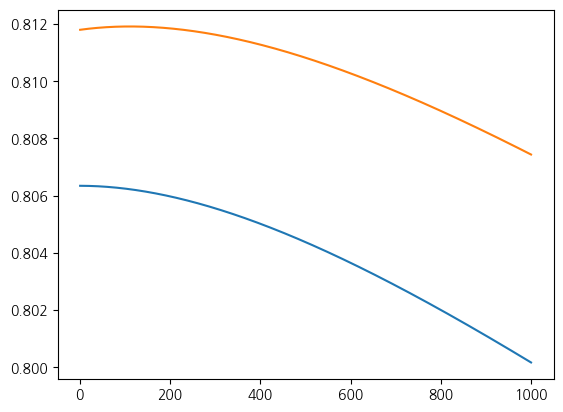

In [56]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 1001):
  ridge = Ridge(alpha = i).fit(X_train, y_train)

  train_list.append(ridge.score(X_train, y_train))
  test_list.append(ridge.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,1001), train_list, label = '훈련 성능')
plt.plot(range(1,1001), test_list, label = '테스트 성능')
plt.show()

0.306
0.8119187792230881


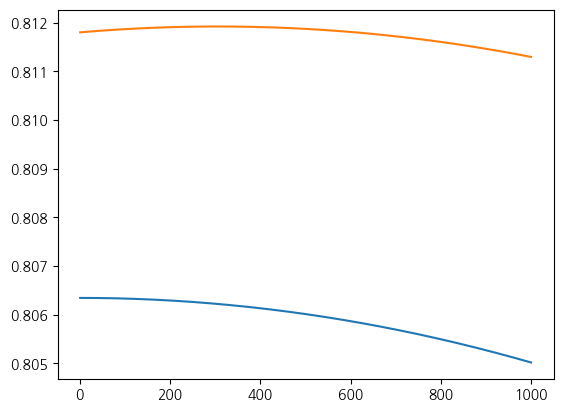

In [57]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 1001):
  lasso = Lasso(alpha = 0.001*i).fit(X_train, y_train)

  train_list.append(lasso.score(X_train, y_train))
  test_list.append(lasso.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = 0.001*i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,1001), train_list, label = '훈련 성능')
plt.plot(range(1,1001), test_list, label = '테스트 성능')
plt.show()

### 무게, 출시년도, 제조국 (제외 : 실린더, 마력, 가속, 배기량) - good

In [52]:
X = df[['weight', 'model year', 'origin']] # 문자열은 머신러닝 학습이 안되기 때문에 name 제외
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

X_test.shape

(118, 2)

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('lr.coef_ :', lr.coef_) # 가중치 (w)
print('lr.intercept_ :', lr.intercept_) # 절편 (b)
print('훈련 데이터셋의 R2: ', lr.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lr.score(X_test, y_test))

lr.coef_ : [-0.00671253  0.76492444]
lr.intercept_ : -14.745148327473505
훈련 데이터셋의 R2:  0.8063465341136888
테스트 데이터셋의 R2:  0.8117977478890179


In [51]:
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', ridge.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', ridge.score(X_test, y_test))

훈련 데이터셋의 R2:  0.8063465341126527
테스트 데이터셋의 R2:  0.8117977697569483


119
0.8152253637369871


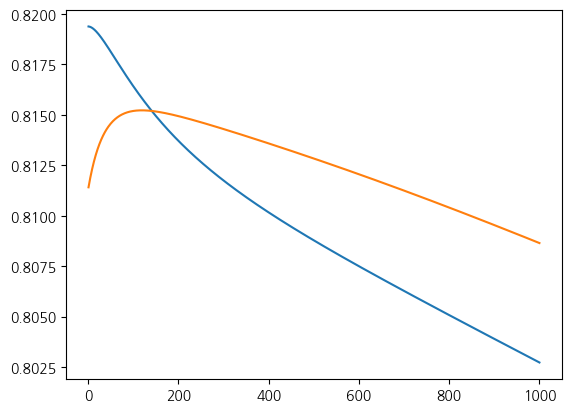

In [47]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 1001):
  ridge = Ridge(alpha = i).fit(X_train, y_train)

  train_list.append(ridge.score(X_train, y_train))
  test_list.append(ridge.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,1001), train_list, label = '훈련 성능')
plt.plot(range(1,1001), test_list, label = '테스트 성능')
plt.show()

In [45]:
lasso = Lasso(0.01).fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', lasso.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lasso.score(X_test, y_test))
print('학습에 사용한 특성 개수: ', np.sum(lasso.coef_ != 0))
print(lasso.coef_)

훈련 데이터셋의 R2:  0.8195124407037641
테스트 데이터셋의 R2:  0.8110001649158349
학습에 사용한 특성 개수:  4
[-0.00574354 -0.10567003  0.75603881  1.35175757]


0.298
0.8152339032083058


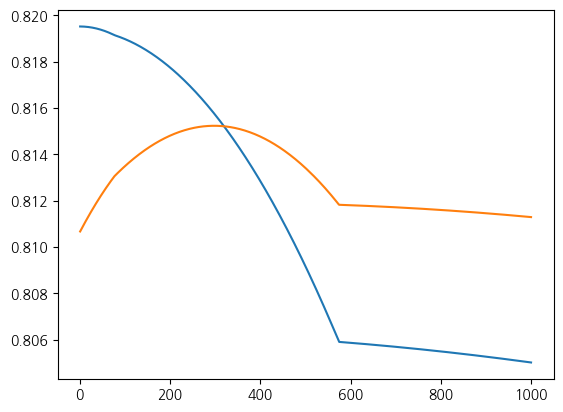

In [46]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 1001):
  lasso = Lasso(alpha = 0.001*i).fit(X_train, y_train)

  train_list.append(lasso.score(X_train, y_train))
  test_list.append(lasso.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = 0.001*i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,1001), train_list, label = '훈련 성능')
plt.plot(range(1,1001), test_list, label = '테스트 성능')
plt.show()

### 무게, 실린더, 출시년도, 제조국, 배기량 (제외 : 가속, 마력) - good

In [77]:
X = df[['weight', 'cylinders', 'model year', 'origin', 'displacement']] # 문자열은 머신러닝 학습이 안되기 때문에 name 제외
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

X_test.shape

(118, 5)

119
0.8153337176240074


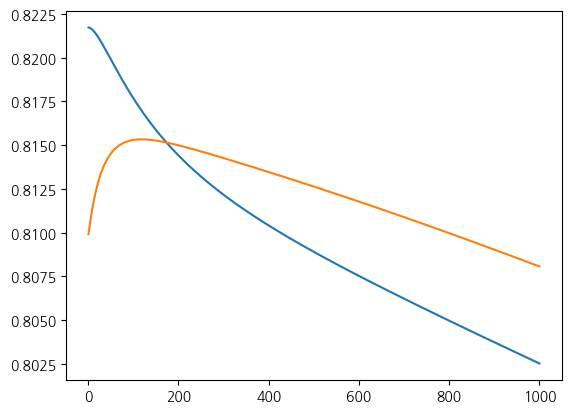

In [48]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 1001):
  ridge = Ridge(alpha = i).fit(X_train, y_train)

  train_list.append(ridge.score(X_train, y_train))
  test_list.append(ridge.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,1001), train_list, label = '훈련 성능')
plt.plot(range(1,1001), test_list, label = '테스트 성능')
plt.show()

In [ ]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 1001):
  lasso = Lasso(alpha = 0.001*i).fit(X_train, y_train)

  train_list.append(lasso.score(X_train, y_train))
  test_list.append(lasso.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = 0.001*i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,1001), train_list, label = '훈련 성능')
plt.plot(range(1,1001), test_list, label = '테스트 성능')
plt.show()

### 실린더, 배기량, 마력, 무게, 출시년도, 제조국 (제외 : 가속) - good

In [78]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']] # 문자열은 머신러닝 학습이 안되기 때문에 name 제외
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

X_test.shape

(118, 6)

49
0.8160141221895573


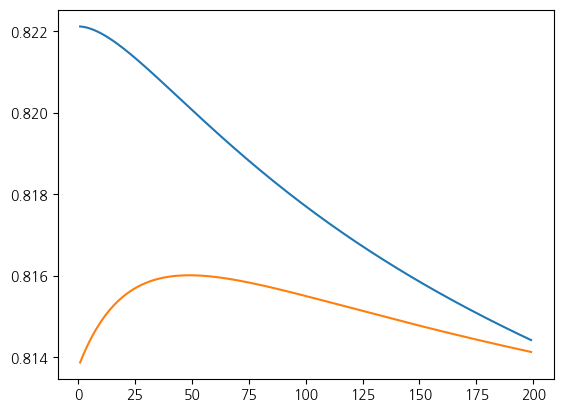

In [39]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 200):
  ridge = Ridge(alpha = i).fit(X_train, y_train)

  train_list.append(ridge.score(X_train, y_train))
  test_list.append(ridge.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,200), train_list, label = '훈련 성능')
plt.plot(range(1,200), test_list, label = '테스트 성능')
plt.show()



0.1233
0.8160317771197734


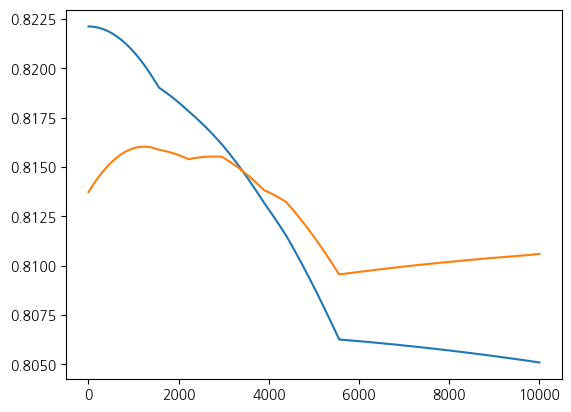

In [40]:
train_list = []
test_list = []
max_score = 0

for i in range(1, 10001):
  lasso = Lasso(alpha = 0.0001*i).fit(X_train, y_train)

  train_list.append(lasso.score(X_train, y_train))
  test_list.append(lasso.score(X_test, y_test))

  if max(test_list) > max_score:
    max_score = max(test_list)
    max_alpha = 0.0001*i

print(max_alpha)
print(max(test_list))
plt.figure(dpi = 100)

plt.plot(range(1,10001), train_list, label = '훈련 성능')
plt.plot(range(1,10001), test_list, label = '테스트 성능')
plt.show()

# name을 제외한 feature를 넣었을 때와 거의 유사한 성능 결과값 출력

In [41]:
lasso123 = Lasso(alpha = 0.12335).fit(X_train, y_train)

print('훈련 데이터셋의 R2: ', lasso123.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lasso123.score(X_test, y_test))
print('학습에 사용한 특성 개수: ', np.sum(lasso123.coef_ != 0))
print(lasso123.coef_)

# 가속을 0으로 만든 라쏘 회귀 모델과 가속을 완전히 제외한 라쏘 회귀 모델의 계수는 거의 유사하지만 차이는 존재

#[-0.13951554  0.00674526 -0.00391623 -0.00640886 -0.          0.75954196 1.17214469]

훈련 데이터셋의 R2:  0.8201793799050037
테스트 데이터셋의 R2:  0.8160315392589879
학습에 사용한 특성 개수:  6
[-0.13789144  0.00671748 -0.00390301 -0.00640923  0.75954368  1.17189637]


<function matplotlib.pyplot.show(close=None, block=None)>

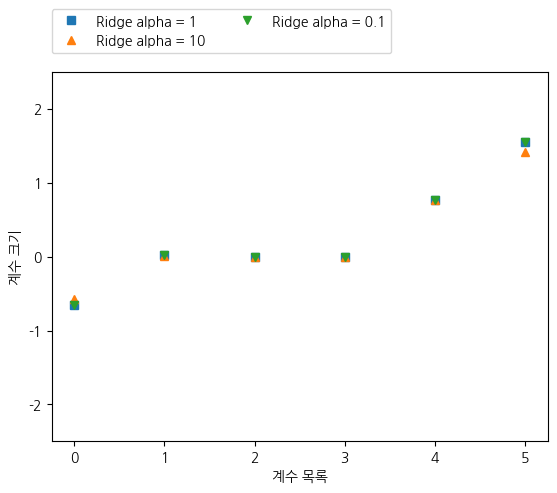

In [80]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# alpha 값에 따른 릿지 회귀
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 'v', label = "Ridge alpha = 0.1")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-2.5, 2.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

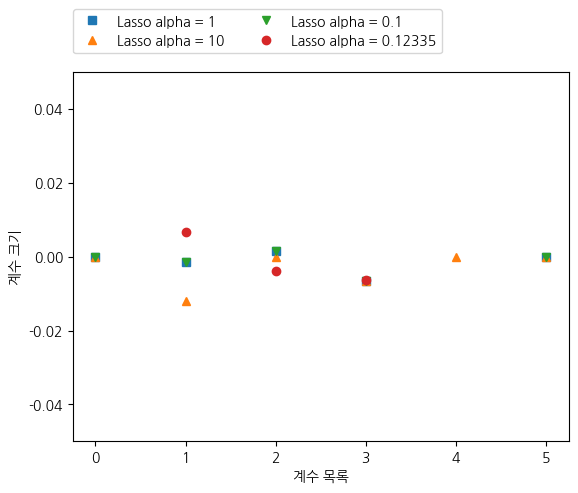

In [67]:
import matplotlib.pyplot as plt

# alpha 값에 따른 라쏘 회귀
lasso = Lasso().fit(X_train, y_train)
lasso10 = Lasso(alpha = 10).fit(X_train, y_train)
lasso01 = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso123 = Lasso(alpha = 0.12335).fit(X_train, y_train)

plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso10.coef_, '^', label = "Lasso alpha = 10")
plt.plot(lasso.coef_, 'v', label = "Lasso alpha = 0.1")
plt.plot(lasso123.coef_, 'o', label = "Lasso alpha = 0.12335")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(0,0)
plt.show

In [84]:
X = df[['displacement', 'horsepower', 'weight', 'model year', 'origin']] # 문자열은 머신러닝 학습이 안되기 때문에 name 제외
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

X_test.shape

(118, 5)

# 당선

In [86]:
ridge = Ridge(alpha = 36).fit(X_train, y_train)

print('훈련데이터셋 R2 : ', ridge.score(X_train, y_train))
print('테스트데이터셋 R2 : ', ridge.score(X_test, y_test))

# 훈련데이터셋과 테스트데이터셋의 차이가 더 작으면서 테스트데이터셋 성능이 높음

훈련데이터셋 R2 :  0.8192360559413924
테스트데이터셋 R2 :  0.8161756259641273


### 정리

1. **규제에 따른 성능 차이**가 별로 크지 않은 데이터셋 (소수점 차이)
2. **릿지 회귀 모델** : 가중치의 절대값을 0에 가깝게 만들어 규제를 조절할 수 있는 데에 의의가 있는데 규제에 따른 성능 차이가 없는 상황에서 선형 회귀와 큰 차이가 없음
3. **라쏘 회귀 모델** : 일부 계수를 0으로 만들어 모델의 중요한 특징이 무엇인지 드러나게 하는데 가중치를 확인해본 결과 그 절대값이 두드러지게 크지 않은 않음.
4. 릿지 모델과 라쏘 모델의 규제는 같은 값일 때 라쏘가 더 강하기 때문에 가중치 값이 라쏘가 더 크게 나타남 (0에 더 가까움)
5. mpg 데이터셋은 **feature 무게와 출시년도**가 성능에 가장 큰 영향을 미치고 나머지는 성능 결과값에 미묘하게 차이를 줌
6. 결과값 : feature 7개, 라쏘 회귀 모델, alpha = 0.12335, 테스트셋 성능 = 0.8160345943109207

# 성능평가 결과 시각화

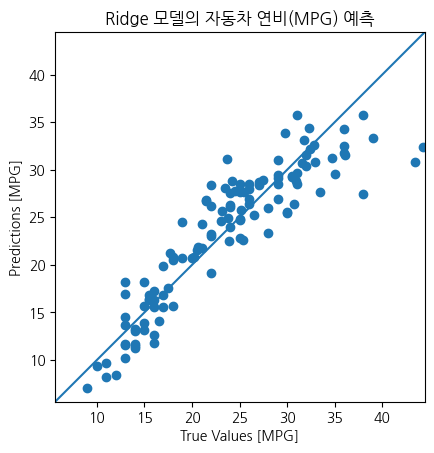

In [90]:
test_predictions = ridge.predict(X_test)

plt.title('Ridge 모델의 자동차 연비(MPG) 예측')

plt.scatter(y_test, test_predictions)

plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()][1])
plt.xlim([0, plt.ylim()][1])
_ = plt.plot([-100, 100], [-100, 100]) # 선

# 연비가 커질수록 오차가 커지고 있음 (연비가 높을수록 모델이 실제값보다 크게 예측) -> 연비가 높은 데이터를 더 수집
#                                 (연비가 낮을 때 모델이 실제값보다 크게 예측) -> 연비가 낮은 데이터를 더 수집

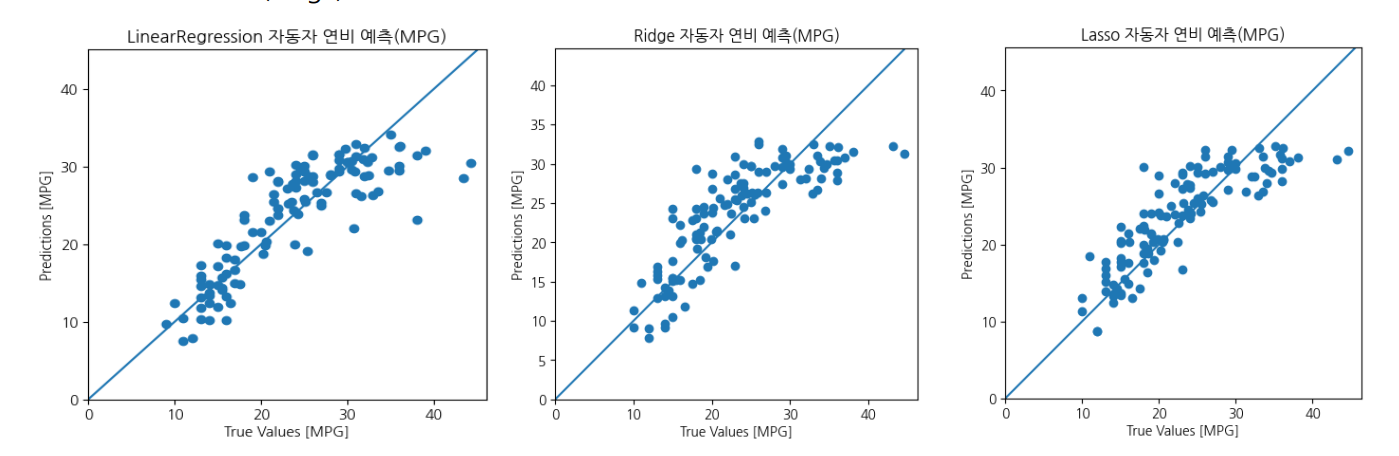

-> 높은 연비를 잘 예측하는 모델이 정확도가 높았을 것